In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as spstats


In [2]:
df = pd.read_csv("C://DataScience//Regis24/unique_orders.csv")
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)
df.drop(columns = ['ORDER_ID', 'CUSTOMER_ID', 'delay_duration','NR_ITEMS_UNIQUE', 'NR_ITEMS',
                   'total_orders', 'paytime', 'rank' ], inplace=True)


In [3]:
# Monday is 0 and Sunday is 6
df['PAYMENT_DATE'] = pd.to_datetime(df['PAYMENT_DATE'])
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'])

df['PAYMENT_DATE_year'] = df['PAYMENT_DATE'].dt.year#2
df['PAYMENT_DATE_month'] = df['PAYMENT_DATE'].dt.month#3
df['PAYMENT_DATE_day'] = df['PAYMENT_DATE'].dt.day#2
df['PAYMENT_DATE_day_of_week'] = df['PAYMENT_DATE'].dt.dayofweek
df['PAYMENT_DATE_is_month_start'] = df['PAYMENT_DATE'].dt.is_month_start
df['PAYMENT_DATE_is_month_end'] = df['PAYMENT_DATE'].dt.is_month_end
df['ORDER_DATE_year'] = df['ORDER_DATE'].dt.year#2
df['ORDER_DATE_month'] = df['ORDER_DATE'].dt.month#3
df['ORDER_DATE_day'] = df['ORDER_DATE'].dt.day#2
df['ORDER_DATE_day_of_week'] = df['ORDER_DATE'].dt.dayofweek
df['ORDER_DATE_is_month_start'] = df['ORDER_DATE'].dt.is_month_start
df['ORDER_DATE_is_month_end'] = df['ORDER_DATE'].dt.is_month_end
df['PAYMENT_DATE_is_weekend'] = np.where(df['PAYMENT_DATE_day_of_week'].isin([5,6]), 1, 0)
df['ORDER_DATE_is_weekend'] = np.where(df['ORDER_DATE_day_of_week'].isin([5,6]), 1, 0)

df['PAYMENT_DATE_is_month_start'] = df['PAYMENT_DATE_is_month_start'].astype(str)
df['PAYMENT_DATE_is_month_end'] = df['PAYMENT_DATE_is_month_end'].astype(str)
df['ORDER_DATE_is_month_end'] = df['ORDER_DATE_is_month_end'].astype(str)
df['ORDER_DATE_is_month_start'] = df['ORDER_DATE_is_month_start'].astype(str)


In [4]:
df.drop(columns = ['PAYMENT_DATE','ORDER_DATE'], inplace=True)

In [5]:
df.dtypes

PAYMENT_INFO                    object
payment_duration                 int64
SHOP                            object
AGE                              int64
CART_VALUE                     float64
GENDER                          object
Default_Flag                     int64
delay_category                  object
PAYMENT_DATE_year                int64
PAYMENT_DATE_month               int64
PAYMENT_DATE_day                 int64
PAYMENT_DATE_day_of_week         int64
PAYMENT_DATE_is_month_start     object
PAYMENT_DATE_is_month_end       object
ORDER_DATE_year                  int64
ORDER_DATE_month                 int64
ORDER_DATE_day                   int64
ORDER_DATE_day_of_week           int64
ORDER_DATE_is_month_start       object
ORDER_DATE_is_month_end         object
PAYMENT_DATE_is_weekend          int32
ORDER_DATE_is_weekend            int32
dtype: object

### AGE 

In [6]:
stats_numeric_AGE = df['AGE'].describe().round(3)
print (stats_numeric_AGE)

count    1701855.000
mean          50.945
std           14.736
min            3.000
25%           41.000
50%           51.000
75%           60.000
max          120.000
Name: AGE, dtype: float64


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

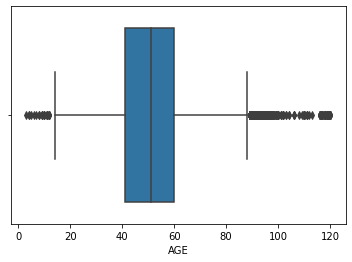

In [7]:
sns.boxplot(df['AGE'])

Text(0, 0.5, 'Frequency')

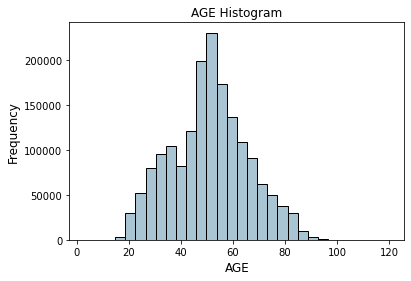

In [8]:
fig, ax = plt.subplots()
df['AGE'].hist(color='#A9C5D3', edgecolor='black', bins=30, grid=False)
ax.set_title('AGE Histogram', fontsize=12)
ax.set_xlabel('AGE', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [9]:
stats_numeric_CART_VALUE = df['CART_VALUE'].describe().round(3)
print (stats_numeric_CART_VALUE)

count    1701855.000
mean         129.197
std          178.826
min            0.010
25%           42.140
50%           73.950
75%          144.940
max        10980.260
Name: CART_VALUE, dtype: float64


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CART_VALUE'>

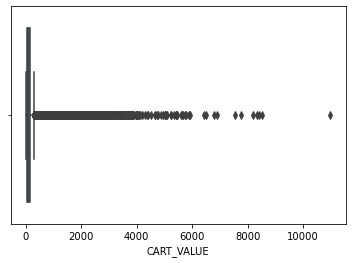

In [10]:
# Box Plot
sns.boxplot(df['CART_VALUE'])

In [11]:
# Check cart value above 800
cartvalue_above800 = df[ df['CART_VALUE'] > 800 ]
payment_group = cartvalue_above800.groupby('PAYMENT_INFO')
payment_group.size()

PAYMENT_INFO
CONTRACT_TERMINATION        2
INKASSO_CLOSED             87
INKASSO_PENDING            27
PAID_FULL               20325
PAID_OVER                 216
dtype: int64

In [12]:
cartvalue_above800.shape

(20657, 22)

In [13]:
# drop these rows having cart value above 1000
# from dataFrame
df = df.drop(df[df['CART_VALUE'] > 800].index)
df.head(3)


,PAYMENT_INFO,payment_duration,SHOP,AGE,CART_VALUE,GENDER,Default_Flag,delay_category,PAYMENT_DATE_year,PAYMENT_DATE_month,PAYMENT_DATE_day,PAYMENT_DATE_day_of_week,PAYMENT_DATE_is_month_start,PAYMENT_DATE_is_month_end,ORDER_DATE_year,ORDER_DATE_month,ORDER_DATE_day,ORDER_DATE_day_of_week,ORDER_DATE_is_month_start,ORDER_DATE_is_month_end,PAYMENT_DATE_is_weekend,ORDER_DATE_is_weekend
0,PAID_FULL,22,Shoes,22,183.40,f,0,1-14 days,2016,12,10,5,False,False,2016,11,18,4,False,False,1,0
1,PAID_FULL,4,Fashion,62,59.99,f,0,On Time,2016,11,22,1,False,False,2016,11,18,4,False,False,0,0
2,PAID_FULL,41,Fashion,22,45.00,f,0,15-29 days,2016,12,29,3,False,False,2016,11,18,4,False,False,0,0


In [14]:
len(df['CART_VALUE'].unique())

56430

### payment_duration 

In [15]:
stats_numeric_payment_duration = df['payment_duration'].describe().round(3)
print (stats_numeric_payment_duration)

count    1681198.000
mean          20.396
std           27.146
min            1.000
25%            8.000
50%           14.000
75%           23.000
max          365.000
Name: payment_duration, dtype: float64


In [16]:
df = df.drop(df[df['payment_duration'] > 200].index)
df.shape

(1672446, 22)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment_duration'>

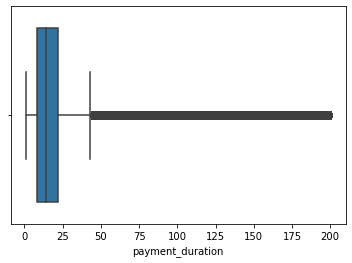

In [17]:
sns.boxplot(df['payment_duration'])

Text(0, 0.5, 'Frequency')

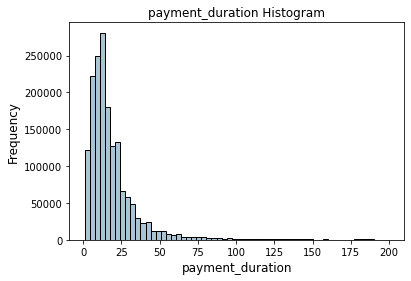

In [18]:
fig, ax = plt.subplots()
df['payment_duration'].hist(color='#A9C5D3', edgecolor='black', bins=60, grid=False)
ax.set_title('payment_duration Histogram', fontsize=12)
ax.set_xlabel('payment_duration', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

### Categorical Vairables:
* PAYMENT_DATE_year           
* PAYMENT_DATE_month          
* PAYMENT_DATE_day            
* PAYMENT_DATE_day_of_week    
* ORDER_DATE_year             
* ORDER_DATE_month            
* ORDER_DATE_day              
* ORDER_DATE_day_of_week      
* SHOP                        
* PAYMENT_INFO                
* delay_category              
* GENDER                      
* Default_Flag               

### Numerical variables

* payment_duration        
* AGE                     
* CART_VALUE   

Text(0, 0.5, 'Frequency')

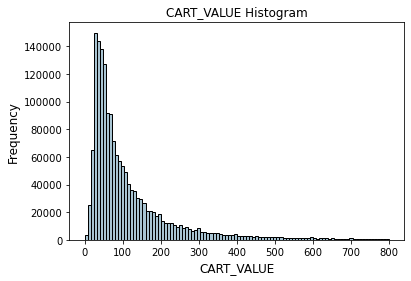

In [19]:
fig, ax = plt.subplots()
df['CART_VALUE'].hist(color='#A9C5D3', edgecolor='black', bins=100, grid=False)
ax.set_title('CART_VALUE Histogram', fontsize=12)
ax.set_xlabel('CART_VALUE', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [20]:
df['CART_VALUE']= round(df['CART_VALUE'])
len(df['CART_VALUE'].unique())

801

In [21]:
df.shape

(1672446, 22)

### SPLIT DATA INTO TRAIN AND TEST

In [23]:
#Splitting the dataset to Test and Train
from sklearn.model_selection import train_test_split

X = df.drop(['delay_category'], axis= 1)
y = df['delay_category']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.2)
X_train = X_train.copy()            

In [ ]:
#df.dtypes

In [24]:
### Normalize the pay_duration, age and Cart_value

In [25]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()

In [26]:
# copy the data
X_train_min_max_scaled = X_train.copy()
  
# apply normalization techniques by Column 1
column = 'AGE'
X_train_min_max_scaled[column] = (X_train_min_max_scaled[column] - X_train_min_max_scaled[column].min()) / (X_train_min_max_scaled[column].max() - X_train_min_max_scaled[column].min())    

column = 'payment_duration'
X_train_min_max_scaled[column] = (X_train_min_max_scaled[column] - X_train_min_max_scaled[column].min()) / (X_train_min_max_scaled[column].max() - X_train_min_max_scaled[column].min())    

column = 'CART_VALUE'
X_train_min_max_scaled[column] = (X_train_min_max_scaled[column] - X_train_min_max_scaled[column].min()) / (X_train_min_max_scaled[column].max() - X_train_min_max_scaled[column].min())    


In [27]:
# Test data same steps:
X_train = X_train_min_max_scaled

In [28]:
X_train['payment_duration'].head(3)

272696    0.080402
89577     0.050251
102250    0.070352
Name: payment_duration, dtype: float64

In [29]:
X_train['CART_VALUE'].head(3)

272696    0.03250
89577     0.17375
102250    0.06875
Name: CART_VALUE, dtype: float64

In [30]:
X_train['AGE'].head(3)

272696    0.675214
89577     0.401709
102250    0.170940
Name: AGE, dtype: float64

In [31]:
X_train.shape

(1337956, 21)

In [32]:
X_train.dtypes

PAYMENT_INFO                    object
payment_duration               float64
SHOP                            object
AGE                            float64
CART_VALUE                     float64
GENDER                          object
Default_Flag                     int64
PAYMENT_DATE_year                int64
PAYMENT_DATE_month               int64
PAYMENT_DATE_day                 int64
PAYMENT_DATE_day_of_week         int64
PAYMENT_DATE_is_month_start     object
PAYMENT_DATE_is_month_end       object
ORDER_DATE_year                  int64
ORDER_DATE_month                 int64
ORDER_DATE_day                   int64
ORDER_DATE_day_of_week           int64
ORDER_DATE_is_month_start       object
ORDER_DATE_is_month_end         object
PAYMENT_DATE_is_weekend          int32
ORDER_DATE_is_weekend            int32
dtype: object

In [ ]:
# X_train['PAYMENT_DATE_year','PAYMENT_DATE_month','PAYMENT_DATE_day','PAYMENT_DATE_day_of_week','ORDER_DATE_year','ORDER_DATE_month','ORDER_DATE_day','ORDER_DATE_day_of_week' ].head(30)

In [ ]:
# # Label encoding 

# PAYMENT_DATE_year                int64
# PAYMENT_DATE_month               int64
# PAYMENT_DATE_day                 int64
# PAYMENT_DATE_day_of_week         int64
# PAYMENT_DATE_is_month_start       bool
# PAYMENT_DATE_is_month_end         bool
# ORDER_DATE_year                  int64
# ORDER_DATE_month                 int64
# ORDER_DATE_day                   int64
# ORDER_DATE_day_of_week           int64
# ORDER_DATE_is_month_start         bool
# ORDER_DATE_is_month_end           bool
# PAYMENT_DATE_is_weekend          int32
# ORDER_DATE_is_weekend            int32

In [34]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder() 

In [35]:
cols = ['PAYMENT_DATE_month', 'PAYMENT_DATE_year', 'PAYMENT_DATE_day','PAYMENT_DATE_day_of_week','ORDER_DATE_year','ORDER_DATE_month','ORDER_DATE_day','ORDER_DATE_day_of_week' ]

# Encode labels of multiple columns at once
X_train[cols] = X_train[cols].apply(le.fit_transform)

# Print head
X_train.head(3)

,PAYMENT_INFO,payment_duration,SHOP,AGE,CART_VALUE,GENDER,Default_Flag,PAYMENT_DATE_year,PAYMENT_DATE_month,PAYMENT_DATE_day,PAYMENT_DATE_day_of_week,PAYMENT_DATE_is_month_start,PAYMENT_DATE_is_month_end,ORDER_DATE_year,ORDER_DATE_month,ORDER_DATE_day,ORDER_DATE_day_of_week,ORDER_DATE_is_month_start,ORDER_DATE_is_month_end,PAYMENT_DATE_is_weekend,ORDER_DATE_is_weekend
272696,PAID_FULL,0.080402,Fashion,0.675214,0.03250,m,0,2,3,12,4,False,False,2,2,26,1,False,False,0,0
89577,PAID_FULL,0.050251,Jewellery,0.401709,0.17375,f,0,1,5,1,4,False,False,1,4,21,0,False,False,0,0
102250,PAID_FULL,0.070352,Sports,0.170940,0.06875,f,0,1,6,2,0,False,False,1,5,17,6,False,False,0,1


In [ ]:
# # onehot encoding

# # First label encode the required columns
# PAYMENT_DATE_is_month_start    
# PAYMENT_DATE_is_month_end        
# ORDER_DATE_is_month_start      
# ORDER_DATE_is_month_end        
# PAYMENT_DATE_is_weekend        
# ORDER_DATE_is_weekend          
# SHOP  
# PAYMENT_INFO
# GENDER 
# Default_Flag 

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
   
# # creating one hot encoder object with categorical feature 0
# # indicating the first column
# columnTransformer = ColumnTransformer([('encoder',
#                                         OneHotEncoder(),
#                                         [0])],
#                                       remainder='passthrough')
  
# data = np.array(columnTransformer.fit_transform(data), dtype = np.str)

In [ ]:
# Get all names 

for col_name in X_train.columns: 
    index_no = X_train.columns.get_loc(col_name)
    print(col_name, index_no)

In [36]:
dummies_X_Train = pd.get_dummies(X_train[['PAYMENT_DATE_is_month_start', 'PAYMENT_DATE_is_month_end','ORDER_DATE_is_month_start',
        'ORDER_DATE_is_month_end','PAYMENT_DATE_is_weekend', 'ORDER_DATE_is_weekend','SHOP', 
        'PAYMENT_INFO', 'GENDER']])

In [ ]:
dummies_X_Train.head()

In [37]:
dummies_X_Train.columns

Index(['PAYMENT_DATE_is_weekend', 'ORDER_DATE_is_weekend',
       'PAYMENT_DATE_is_month_start_False', 'PAYMENT_DATE_is_month_start_True',
       'PAYMENT_DATE_is_month_end_False', 'PAYMENT_DATE_is_month_end_True',
       'ORDER_DATE_is_month_start_False', 'ORDER_DATE_is_month_start_True',
       'ORDER_DATE_is_month_end_False', 'ORDER_DATE_is_month_end_True',
       'SHOP_Baby & Child', 'SHOP_Car Accessories',
       'SHOP_DIY Superstore & Tools', 'SHOP_Electronics', 'SHOP_Fashion',
       'SHOP_Food', 'SHOP_Furniture', 'SHOP_Jewellery', 'SHOP_Media',
       'SHOP_Shoes', 'SHOP_Sports', 'SHOP_Toys', 'SHOP_Young Fashion',
       'PAYMENT_INFO_CONTRACT_TERMINATION', 'PAYMENT_INFO_INKASSO_CLOSED',
       'PAYMENT_INFO_INKASSO_PENDING', 'PAYMENT_INFO_PAID_FULL',
       'PAYMENT_INFO_PAID_OVER', 'GENDER_f', 'GENDER_m', 'GENDER_u'],
      dtype='object')

In [38]:
dummies_X_Train.head()

,PAYMENT_DATE_is_weekend,ORDER_DATE_is_weekend,PAYMENT_DATE_is_month_start_False,PAYMENT_DATE_is_month_start_True,PAYMENT_DATE_is_month_end_False,PAYMENT_DATE_is_month_end_True,ORDER_DATE_is_month_start_False,ORDER_DATE_is_month_start_True,ORDER_DATE_is_month_end_False,ORDER_DATE_is_month_end_True,SHOP_Baby & Child,SHOP_Car Accessories,SHOP_DIY Superstore & Tools,SHOP_Electronics,SHOP_Fashion,SHOP_Food,SHOP_Furniture,SHOP_Jewellery,SHOP_Media,SHOP_Shoes,SHOP_Sports,SHOP_Toys,SHOP_Young Fashion,PAYMENT_INFO_CONTRACT_TERMINATION,PAYMENT_INFO_INKASSO_CLOSED,PAYMENT_INFO_INKASSO_PENDING,PAYMENT_INFO_PAID_FULL,PAYMENT_INFO_PAID_OVER,GENDER_f,GENDER_m,GENDER_u
272696,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
89577,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
102250,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1381039,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
512947,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


# Test Data

In [ ]:
# # copy the data
# X_train_min_max_scaled = X_train.copy()
  
# # apply normalization techniques by Column 1
# column = 'AGE'
# X_train_min_max_scaled[column] = (X_train_min_max_scaled[column] - X_train_min_max_scaled[column].min()) / (X_train_min_max_scaled[column].max() - X_train_min_max_scaled[column].min())    
  
# column = 'payment_duration'
# X_train_min_max_scaled[column] = (X_train_min_max_scaled[column] - X_train_min_max_scaled[column].min()) / (X_train_min_max_scaled[column].max() - X_train_min_max_scaled[column].min())    


# column = 'CART_VALUE'
# X_train_min_max_scaled[column] = (X_train_min_max_scaled[column] - X_train_min_max_scaled[column].min()) / (X_train_min_max_scaled[column].max() - X_train_min_max_scaled[column].min())    


In [ ]:
# cols = ['PAYMENT_DATE_month', 'PAYMENT_DATE_year', 'PAYMENT_DATE_day','PAYMENT_DATE_day_of_week','ORDER_DATE_year','ORDER_DATE_month','ORDER_DATE_day','ORDER_DATE_day_of_week' ]

# # Encode labels of multiple columns at once
# X_train[cols] = X_train[cols].apply(le.fit_transform)

# # Print head
# X_train.head(30)

In [ ]:
# cols_le = ['PAYMENT_DATE_is_month_start', 'PAYMENT_DATE_is_month_end','ORDER_DATE_is_month_start',
#         'ORDER_DATE_is_month_end','PAYMENT_DATE_is_weekend', 'ORDER_DATE_is_weekend','SHOP', 
#         'PAYMENT_INFO', 'GENDER']

# # Encode labels of multiple columns at once
# X_train[cols_le] = X_train[cols_le].apply(le.fit_transform)
# # onehot encoding on Default_Flag

# X_train.head()

In [ ]:
# dummies_X_Train = pd.get_dummies(X_train[['PAYMENT_DATE_is_month_start', 'PAYMENT_DATE_is_month_end','ORDER_DATE_is_month_start',
#         'ORDER_DATE_is_month_end','PAYMENT_DATE_is_weekend', 'ORDER_DATE_is_weekend','SHOP', 
#         'PAYMENT_INFO', 'GENDER']])